In [223]:
# This is the Titanic Competition project
# The goal of this project is to apply data science skills to create a model 
# that predicts which passengers survived the Titanic shipwreck.
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import missingno

# Listing all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [224]:
# Loading the data from train.csv and printing it
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
# Loading the contents of test.csv and printing first 5 rows
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [226]:
# Looking for how many females survived.
# Calculating the percentage of female passengers in the survived ones
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)



% of women who survived: 0.7420382165605095


In [227]:
# Looking for how many males survived.
# Calculating the percentage of male passengers in the survived ones

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [228]:
# Looking for patterns in 4 columns of the train.csv - in Pclass(passenger class),
# "Sex", "SibSp"(if they had sibling of spouse on board), "Parch"
# Creating predictive model
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output)
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


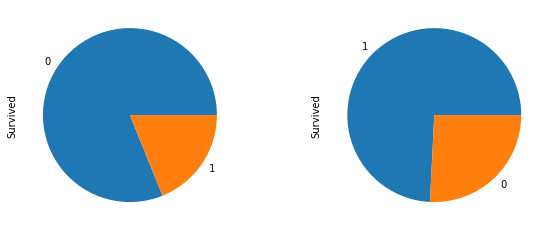

In [229]:
# Plottingthe gender role in survival on pie charts
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
train_data.Survived[train_data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
train_data.Survived[train_data['Sex'] == 'female'].value_counts().plot(kind='pie')

In [230]:
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

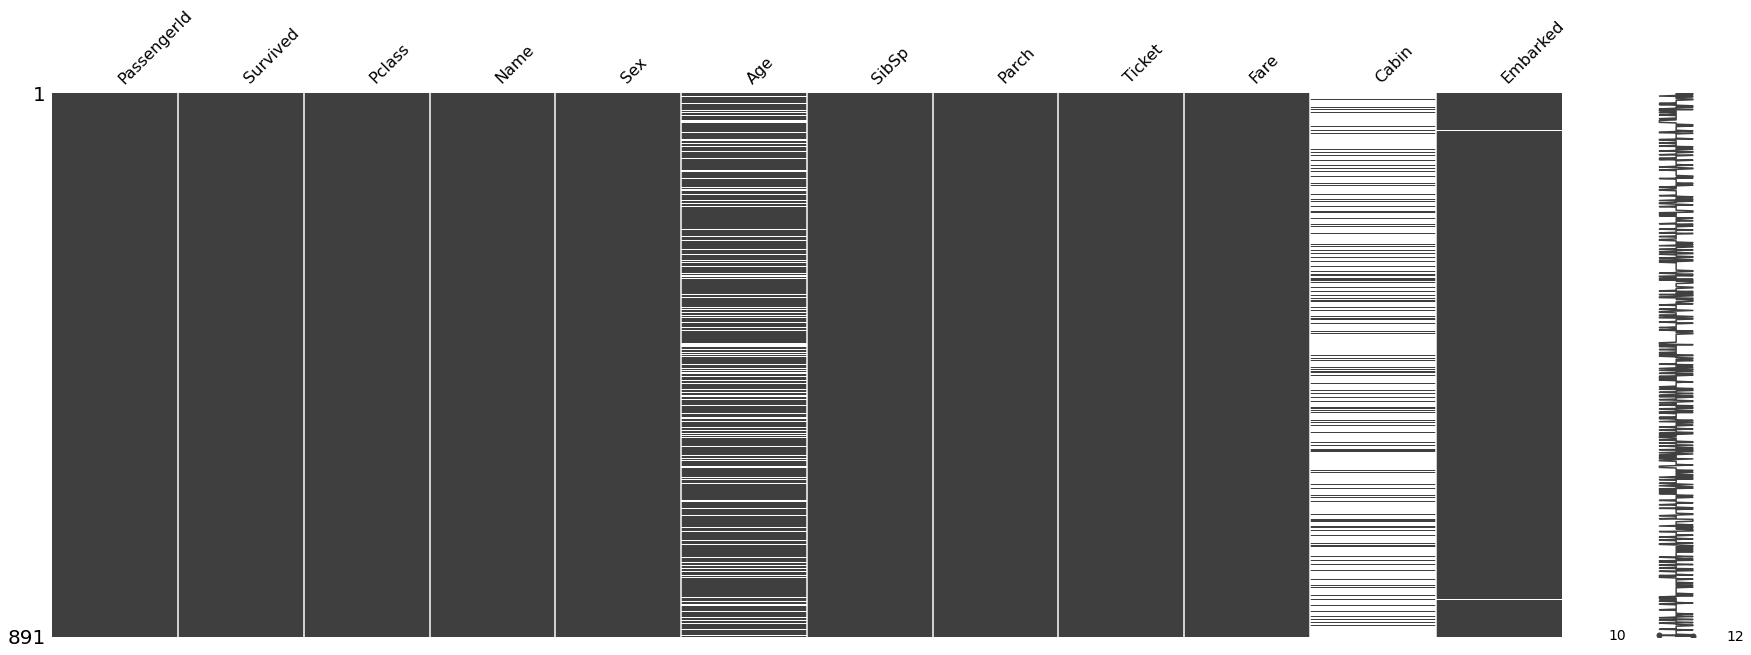

In [231]:
# Looking for missing data. Detecting rows which are missing a value or have NaN instead 
# of data types in the rest of columns.
# Plot graphic of missing values
# Cabin has the most of missing data, age has less.
missingno.matrix(train_data, figsize = (30,10))

In [232]:
#Printing out number of missed data cells
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [233]:
# ------- Descriptions of Data------

# Survival: 0 = No, 1 = Yes
# pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd
# sex: Sex
# Age: Age in years
# sibsp: number of siblings/spouses aboard the Titanic
# parch: number of parents/children aboard the Titanic
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [234]:
#Spliting the titles from the passenger names which is itself a feature but also help in calculating missing median age values
train_data['Name'] = train_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [235]:
train_data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train_data.Age[(train_data["Age"] != -1) & (train_data['Name'] == title)].median()
    medians[title] = median
    
for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


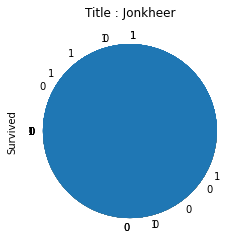

In [239]:

i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1


In [ ]:
# Creating a data frame
df = pd.DataFrame()
df['Survived'] = train_data['Survived']
df.head()

In [ ]:
train_data.Pclass.isnull().sum()
df['Pclass'] = train_data['Pclass']

In [ ]:
# Number of different titles of passagers
train_data.Name.value_counts()
df['Titles'] = train_data['Name']
df.head()

In [ ]:
# Adding sex to the subset of dataframe 
df['Sex'] = train_data['Sex']
df.head()

In [ ]:
# Adding number of spouses and siblings to the data frame
df['SibSp'] = train_data['SibSp']
df.head()

In [ ]:
df['Parch'] = train_data['Parch']
df.head()